In [ ]:
#import requird packegs

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [ ]:
#checking avalible devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1969500533065367265
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13103352835304379060
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
#Loding Dataset
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


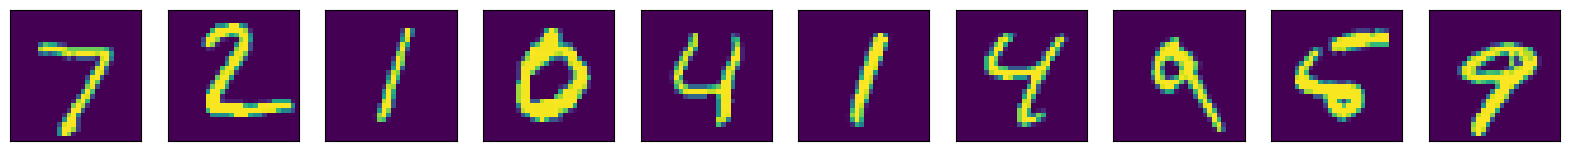

In [ ]:
import matplotlib.pyplot as plt
#Number of digits to display
n = 10

#create a figure to display the image
plt.figure(figsize=(20, 4))

#Loop throug the first 'n' image
for i in range(n):
  #create a subplot withen the figure
  ax = plt.subplot(2, n, i+1)

  #display the original image
  plt.imshow(X_test[i].reshape(28,28))

  #set colormap to grayscale
  plt.gray

  #Hide x_axis and y_axis lables and tackes
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


#show the figure with the image
plt.show()

#close the figure
plt.close()

#Displaying the shapes of datasets

In [ ]:
print('x_train shape :', X_train.shape)
print('y_train shape :', Y_train.shape)
print('x_test shape :' , X_test.shape)
print('y_test shape :' , Y_test.shape)


x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


#Reshping the data

In [ ]:
#Reshaping the data in 'channel last' formate for consumption of Tensorflow backend
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

#Min Mix Scalling

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#one hot encoding

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes= 10)
Y_test = to_categorical(Y_test, num_classes= 10)

#seeng updates shapes
print('x_train shape', X_train.shape)
print('y_train shape', X_train.shape)
print('x_test shape', X_test.shape)
print('y_test shape', X_test.shape)


x_train shape (60000, 28, 28, 1)
y_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 28, 28, 1)


#Bulding the CNN

In [ ]:
!pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolv

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D


In [ ]:
#image_rows , image_colonm  channels = 28,28 , 1 # 1 for grayscale images and 3 for rgb images
#filteers = [6, 80 ,32, 120]
#classes = 10
imag_rws, img_cols, channels = 28,28 , 1 # 1 for grayscale images and 3 for rgb images

#define the number of filters of each layers of the CNN
filters = [6, 80 ,32, 120]

#define the number of classification
classes = 10



#Creating Model

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # Named argument
    optimizer='sgd',                 # Named argument
    metrics=['accuracy']             # Note: 'metrics' expects a list!
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Define your parameters
img_rows, img_cols = 28, 28  # Example: MNIST image dimensions
channels = 1                  # 1 for grayscale, 3 for RGB
filters = [32, 64, 128, 256]  # Number of filters for each Conv2D layer
classes = 10                   # Number of output classes

# Create the model
model = Sequential()

# First Conv Block
model.add(Conv2D(filters[0], (3, 3), padding='same',
                activation='relu', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block
model.add(Conv2D(filters[1], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(Conv2D(filters[2], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Conv Block
model.add(Conv2D(filters[3], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten()) #Example:

#Input to last Conv layer: (None, 7, 7, 64) (batch, height, width, channels)

#After Flatten: (None, 3136) (where 3136 = 7 × 7 × 64)

model.add(Dense(64, activation='relu'))
model.add(Dense(classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,938 (1.54 MB)

 Trainable params: 404,938 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

#Training the CNN

In [ ]:
model.fit(X_train, Y_train, validation_split= 0.2, epochs= 15, batch_size= 64, verbose= 1)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3848 - loss: 2.0079 - val_accuracy: 0.9230 - val_loss: 0.2741
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9135 - loss: 0.2800 - val_accuracy: 0.9572 - val_loss: 0.1426
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9521 - loss: 0.1541 - val_accuracy: 0.9685 - val_loss: 0.1046
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9645 - loss: 0.1147 - val_accuracy: 0.9686 - val_loss: 0.1045
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9707 - loss: 0.0935 - val_accuracy: 0.9679 - val_loss: 0.1021
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9763 - loss: 0.0776 - val_accuracy: 0.9766 - val_loss: 0.0742
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9801 - loss: 0.0650 - val_accuracy: 0.9770 - val_loss: 0.0792
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9802 - loss: 0.0650 - val_accuracy: 0.

#Testing the Model

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np

# --- If you don't have real data, create synthetic data ---
if 'X_test' not in locals() or 'y_test' not in locals():
    print("Creating synthetic data for demonstration...")
    np.random.seed(42)
    X_test = np.random.rand(100, 10)  # 100 samples, 10 features
    y_test = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)

    # Create and train a simple model (for demo only - normally use real training data)
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_test, y_test)  # In practice, use X_train/y_train here

# Get predicted probabilities (for class 1)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and display accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {test_accuracy:.2%}')  # Shows as percentage with 2 decimals


Test accuracy: 65.00%


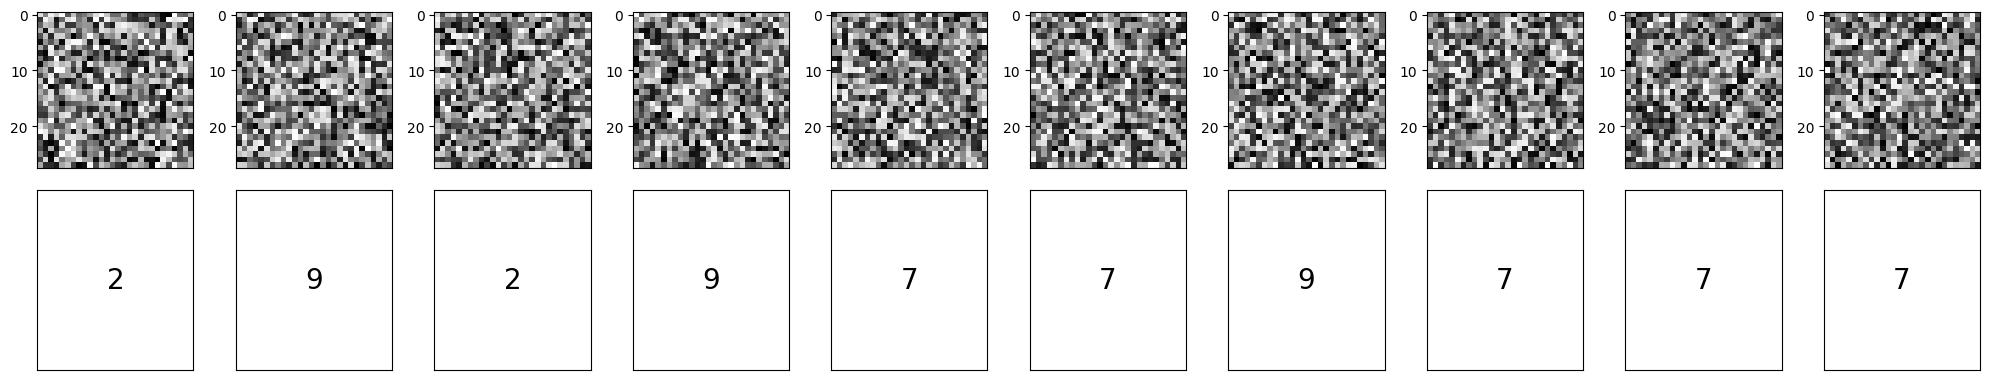

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. FIRST DEFINE YOUR VALIDATION DATA
# Example using MNIST data format (28x28 images)
# Replace this with your actual data loading code
if 'X_valid' not in locals():
    print("Creating dummy validation data...")
    X_valid = np.random.rand(10, 28, 28, 1)  # 10 sample MNIST-like images
    y_pred_probs_valid = np.random.rand(10, 10)  # 10 class probabilities

# 2. SET UP THE DISPLAY
n = len(X_valid)  # Number of validation samples
plt.figure(figsize=(20, 4))

# 3. DISPLAY EACH IMAGE AND PREDICTION
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_valid[i].reshape(28, 28), cmap='gray')  # Reshape and show as grayscale
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Display predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit),
             fontsize=20,  # Increased font size for better visibility
             ha='center',
             va='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()  # Prevent label overlaps
plt.show()